KNN 可以用作分类.KNeighborsClassifier，也可以用于回归.KNeighborsRegreesion
neighbors.KNeighborsClassifier(n_neighbors=5, 
                               weights=’uniform’,
                               algorithm=’auto’, 
                               leaf_size=30, p=2, 
                               metric=’minkowski’, 
                               metric_params=None, n-jobs=1)
                               
n_neighbors 就是 kNN 里的 k，就是在做分类时，我们选取问题点最近的多少个最近邻。

weights 是在进行分类判断时给最近邻附上的加权，默认的 'uniform' 是等权加权，还有 'distance' 选项是按照距离的倒数进行加权，也可以使用用户自己设置的其他加权方法。

algorithm 是分类时采取的算法，有 'brute'、'kd_tree' 和 'ball_tree'。

leaf_size 是 kd_tree 或 ball_tree 生成的树的树叶（树叶就是二叉树中没有分枝的节点）的大小

metric 和 p，是我们在 kNN 入门文章中介绍过的距离函数的选项

n_jobs 是并行计算的线程数量，默认是 1，输入 -1 则设为 CPU 的内核数。

In [1]:
import random
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:

x1=np.random.normal(50,6,200) # 均值，标准差，数量
y1=np.random.normal(5,0.5,200)


In [8]:
print('x1的均值%s'%x1.mean())
print('x1的均值%s'%x1.std())
print('y1的均值%s'%y1.mean())
print('y1的均值%s'%y1.std())

x1的均值50.38903238050307
x1的均值6.349759864590218
y1的均值5.031271669026549
y1的均值0.5020823824970069


In [9]:
x2=np.random.normal(30,6,200)
y2=np.random.normal(4,0.5,200)


In [10]:
print('x2的均值%s'%x2.mean())
print('x2的均值%s'%x2.std())
print('y2的均值%s'%y2.mean())
print('y2的均值%s'%y2.std())

x2的均值50.38903238050307
x2的均值6.349759864590218
y2的均值5.031271669026549
y2的均值0.5020823824970069


In [11]:
x3=np.random.normal(45,6,200)
y3=np.random.normal(2.5,0.5,200)


In [12]:
print('x3的均值%s'%x3.mean())
print('x3的均值%s'%x3.std())
print('y3的均值%s'%y3.mean())
print('y3的均值%s'%y3.std())

x3的均值45.04492876774046
x3的均值5.900579529199043
y3的均值2.509861862753322
y3的均值0.4927485297063472


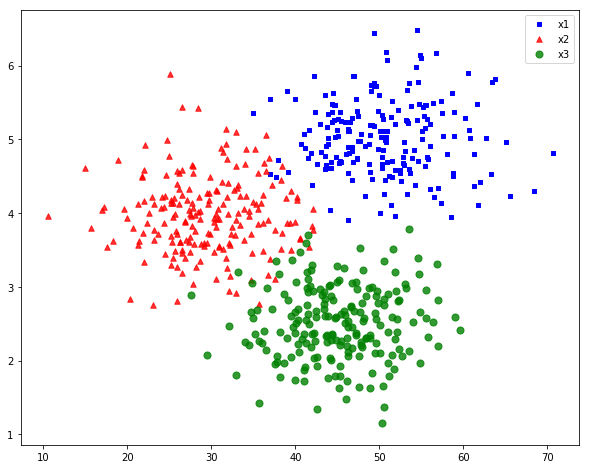

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x1,y1,c='b',marker='s',s=10,alpha=1,label='x1')
plt.scatter(x2,y2,c='r',marker='^',s=30,alpha=0.8,label='x2')
plt.scatter(x3,y3,c='g',marker='o',s=50,alpha=0.8,label='x3')
plt.legend()
plt.show()

In [18]:
# 将x和y坐标放在一起
x_val=np.concatenate((x1,x2,x3))
print('x_val len:',x_val.shape)
y_val=np.concatenate((y1,y2,y3))
print('y_val len:',y_val.shape)

x_val len: (600,)
y_val len: (600,)


In [19]:
x_diff=max(x_val)-min(x_val)
y_diff=max(y_val)-min(y_val)
print("x的最大差值",x_diff)
print("y的最大插值",y_diff)

x的最大差值 60.19559662324438
y的最大插值 5.322799029243704


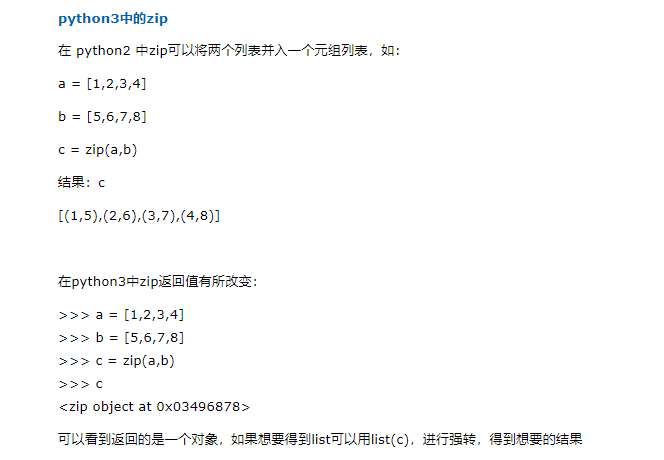

In [35]:
from sklearn.preprocessing import MinMaxScaler
x_min=MinMaxScaler().fit_transform(x_val.reshape(-1,1))

In [33]:
max(x_val)

70.69122330358286

In [34]:
min(x_val)

10.495626680338482

In [28]:
x_val

array([50.27403504, 36.94083002, 52.84861447, 51.81224722, 50.04017855,
       46.30869482, 61.30422025, 55.0386831 , 49.39584346, 54.59686493,
       50.31253156, 43.92009319, 37.73842134, 60.65542879, 49.35938424,
       53.18994722, 43.6842878 , 56.01903211, 55.70925997, 54.77093623,
       42.34637542, 53.56742802, 42.54627035, 43.73972574, 52.41101186,
       43.90465844, 49.32270466, 44.25111008, 58.84565805, 46.7807752 ,
       70.6912233 , 46.89599714, 48.24474163, 50.49235381, 51.41380561,
       45.44359283, 34.894776  , 39.94063876, 37.95826766, 55.29824817,
       57.28544087, 50.84355186, 49.32228095, 46.96682145, 46.75466104,
       52.89439799, 61.57810544, 47.42192968, 46.73867101, 56.95941212,
       57.99275181, 55.04208328, 50.38673031, 46.88754359, 43.93016601,
       55.54546819, 47.31860654, 47.79400586, 68.36905498, 54.0863922 ,
       45.03174033, 53.93170816, 44.06539483, 51.54974816, 56.36260405,
       54.96642112, 50.58069782, 54.52199462, 55.39258961, 44.67

In [36]:
x_min

array([[0.66081924],
       [0.43932123],
       [0.70358947],
       [0.68637281],
       [0.6569343 ],
       [0.59494498],
       [0.84405831],
       [0.73997201],
       [0.64623027],
       [0.7326323 ],
       [0.66145876],
       [0.55526431],
       [0.45257122],
       [0.83328026],
       [0.64562459],
       [0.70925986],
       [0.55134699],
       [0.75625807],
       [0.75111197],
       [0.73552406],
       [0.52912091],
       [0.71553077],
       [0.53244166],
       [0.55226796],
       [0.69631979],
       [0.5550079 ],
       [0.64501525],
       [0.56076333],
       [0.80321542],
       [0.60278742],
       [1.        ],
       [0.60470155],
       [0.62710758],
       [0.66444606],
       [0.67975369],
       [0.58057347],
       [0.40533113],
       [0.48915558],
       [0.45622342],
       [0.74428403],
       [0.77729629],
       [0.67028034],
       [0.64500821],
       [0.60587812],
       [0.6023536 ],
       [0.70435005],
       [0.84860823],
       [0.613

In [37]:
# 归一化处理
x_normalized=[i/x_diff for i in x_val]
print('x_normailized len:',len(x_normalized))
x_normalized=np.mat(x_normalized).T
print(type(x_normalized))

y_normalized=[i/y_diff for i in y_val]
print('y_normailized len:',len(y_normalized))
y_normalized=np.mat(y_normalized).T
print(type(y_normalized))

XY=np.column_stack((x_normalized,y_normalized)) #矩阵拼接
print(XY.shape)


x_normailized len: 600
<class 'numpy.matrixlib.defmatrix.matrix'>
y_normailized len: 600
<class 'numpy.matrixlib.defmatrix.matrix'>
(600, 2)


In [41]:
print(x_normalized[:2])
print(y_normalized[:2])
print(XY[:2])

[[0.83517795]
 [0.61367994]]
[[1.00122353]
 [1.04303366]]
[[0.83517795 1.00122353]
 [0.61367994 1.04303366]]


In [42]:
# 生成标签 列表
label=[1]*200+[2]*200+[3]*200
type(label)

list

In [43]:
# 使用Sklerarn的KNN伪代码
clf=neighbors.KNeighborsClassifier(n_neighbors=20)#输入K值

In [44]:
clf.fit(XY,label) # 训练数据

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

# K最近的数据

In [109]:
#K最近的数据
nearests=clf.kneighbors([(50/x_diff,5/y_diff)],5,False)
nearests #可知训练数据中第[ 31, 178, 164, 179, 134]离点（50，5）最近

array([[115, 101, 116,  41, 189]], dtype=int64)

In [110]:
m=(50/x_diff,5/y_diff)
m

(0.8306255408172601, 0.9393553978893001)

# 预测

In [120]:
prediction=clf.predict([(40/x_diff,4/y_diff)]) #预测点（40，4）的标签
prediction

array([2])

# 概率预测

In [121]:
prediction_proba=clf.predict_proba([(40/x_diff,4/y_diff)]) #预测点（40，4）的概率
prediction_proba

array([[0.05, 0.9 , 0.05]])

# 准确率打分

In [80]:
score=clf.score(XY,label)
print('score is:',score)

score is: 0.976666666667
